# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.preprocessing import (KBinsDiscretizer, OneHotEncoder, StandardScaler)
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [2]:
# Algumas configurações para o matplotlib.
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv", decimal = ',')

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
countries['Country'] = countries['Country'].str.strip()
countries['Region'] = countries['Region'].str.strip()
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country             227 non-null object
Region              227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop_density         227 non-null float64
Coastline_ratio     227 non-null float64
Net_migration       224 non-null float64
Infant_mortality    224 non-null float64
GDP                 226 non-null float64
Literacy            209 non-null float64
Phones_per_1000     223 non-null float64
Arable              225 non-null float64
Crops               225 non-null float64
Other               225 non-null float64
Climate             205 non-null float64
Birthrate           224 non-null float64
Deathrate           223 non-null float64
Agriculture         212 non-null float64
Industry            211 non-null float64
Service             212 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 35.5+ KB


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [6]:
def q1():
    return list(np.sort(countries['Region'].unique()))

q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [7]:
def q2():
    kbins = KBinsDiscretizer(n_bins=10, encode='ordinal',  strategy='quantile')
    
    kbins_tranformed = kbins.fit_transform(countries[['Pop_density']])
    
    return int(sum(kbins_tranformed[:, 0] == 9))
    
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [8]:
def q3():
    one_hot_encoder = OneHotEncoder(sparse=False)
    
    countries_drop = countries[['Region', 'Climate']].dropna(subset = ['Region', 'Climate'])
    
    region_climate_encoder = one_hot_encoder.fit_transform(countries_drop)
    
    return int(region_climate_encoder.shape[1] + 1)
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [9]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [10]:
def q4():
    pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")), 
        ('scale', StandardScaler())])
    
    numeric_features = countries._get_numeric_data()
    
    pipeline.fit_transform(numeric_features)
    
    pipeline_transformed = pipeline.transform([test_country[2:]])
    
    arable_tranformed = pipeline_transformed[:, numeric_features.columns.get_loc("Arable")]
    
    return round(arable_tranformed.item(), 3)
    

q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [11]:
def q5():
    data = countries['Net_migration']
    descriptive_statistics = data.describe()
    
    firt_quantile = descriptive_statistics["25%"]
    third_quantile = descriptive_statistics["75%"]
    quantile_range = third_quantile - firt_quantile
    
   
    low_limit = firt_quantile - 1.5 * quantile_range
    high_limit = third_quantile + 1.5 * quantile_range
    
    print(low_limit)
    print(high_limit)
    
    low_outliers = data[(data < low_limit)]
    high_outliers = data[(data > high_limit)]
    
    return (len(low_outliers), len(high_outliers), False)

q5()

-3.8149999999999995
3.885


(24, 26, False)

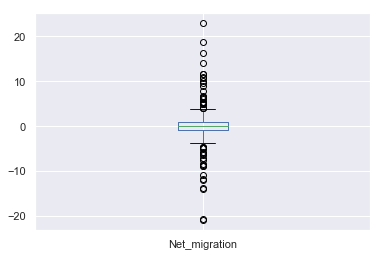

In [13]:
countries['Net_migration'].plot(kind="box")

## Porque não remover os outliers?

Existem algumas perguntas que devem ser feitas quando encontramos outliers em qualquer data set:

1- Eles são erros de input? 
2- Eles dizem alguma coisa em relação o que queremos descobrir?
2- Qual o impacto deles na variável?

A grande questão que sempre haverá um dilema quando se trata de outliers, remover não remover, eis a questão. Não há uma forma simples de responder isso, tudo irá depender das respostas dos questionamentos acima. Mas em regras gerais,se é possível corrigir ouliers caso eles sejam confirmados com erros de iput, corriga, se eles demonstram um comportamento que faz sentido para a variável, não remova ou se a representatividade deles em relação os dados é muito pequena ao ponto que não irá causar impacto, estão remova.

Para o caso que estamos estudando vamos tentar responder os questionamentos:

1 - Eles são erros de input?

     Improvável que haja erro na medição ou input dos dados, visto que é um dataset consolidado, compilado pelo governo dos Estados Unidos.

2- Eles dizem alguma coisa em relação o que queremos descobrir?

    Sim, A variável migration trata sobre a rede de migração, e na história os fatores são geralmente aleatórios, devido política, conflitos, etc, e com isso é natural que existam países com diferentes taxas de migração.
    
3-  Qual o impacto deles na variável?

    Ao todo, temos quase 60 pontos que são considerados outliers, isso é uma quantidade expressiva diante todo, é possível notar que eles são uma característica marcante na variável, sendo assim parte dela.
    
Em conclusão, remover esses outliers irá trazer mais dano que benefício, irá descarecteizer a variável e no fim vamos perder mais infomação.

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [14]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
    
newsgroups = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [15]:
def q6():       
    count_vectorizer = CountVectorizer()
    
    newsgroups_counts = count_vectorizer.fit_transform(newsgroups.data)
    
    return int(newsgroups_counts[:, count_vectorizer.vocabulary_['phone']].sum())
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [16]:
def q7():
    vectorizer = TfidfVectorizer().fit(newsgroups.data)
    
    newsgroups_tfidf_vectorized = vectorizer.transform(newsgroups.data)

    return float(round(newsgroups_tfidf_vectorized[:, vectorizer.vocabulary_['phone']].sum(), 3))
q7()

8.888